# Links I used for this project 
- [Make a table in Jupyter](https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook)
- [Crypto Data metrics](https://coinmetrics.io/tools/)
- [Youtube ML tutorial](https://www.youtube.com/watch?v=rAdAVcS4aL0&list=PLQVvvaa0QuDd0flgGphKCej-9jp-QdzZ3&index=4)
- [Predicting Stock Prices using deep learning](https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe)
- [Moving Average Crossover](https://www.europeanproceedings.com/files/data/article/44/1143/article_44_1143_pdf_100.pdf)
- [Common MAC Periods](https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp)
- [Algorithmic Financial Trading](https://www.researchgate.net/publication/324802031_Algorithmic_Financial_Trading_with_Deep_Convolutional_Neural_Networks_Time_Series_to_Image_Conversion_Approach)
- [Git hub TA Indicators](https://github.com/bukosabino/ta)



# Me Navigating My Way Through the World of Data Science

<br/><br/>


<img src="photo/climbing.jpg" width = "60%">


<br/><br/>

### About Me:

I spend a lot of time climbing, playing music, and adventuring, but have started to miss my STEM roots. Machine learning application is something I feel naturally passionate about so I am doing all these projects for fun to discover if its something I want to persue. Please leave any comments and tell me what I need to improve!! Thank you! Also feel free to go critique my github, I could use any feedback I can get.

__email:__ jamorsicato@gmail.com

__github:__ https://github.com/jamorsicato

__Linekdin:__ https://www.linkedin.com/in/jonathan-morsicato-089977196/

__instagram:__ @jonnymorsicato (if you feel like checking out some Colorado mountain adventures)



In [2]:
# General imports 

import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

#
import os
import time
from datetime import datetime 

#Make table for Data Exploration 
from IPython.display import HTML, display
import tabulate

# family imports
## families are a broad type of model
from sklearn.ensemble import RandomForestRegressor

# cross validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# plotting imports 
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import matplotlib.cbook as cbook
plt.style.use('seaborn')

# alternative to pickle and save our model for the future
## from sklearn.externals import joblib !!!! This didnt load, maybe we will use pickle at the end to save our model 
import pickle

# technical analysis tools 
from ta import add_all_ta_features
from ta.utils import dropna 
from ta.volatility import BollingerBands


#import os
import quandl
from datetime import datetime

# Following "Algorithmic Financial trading" 

## Overview 

- __General Workflow__
    - dataset extract/transform, (DONE)
    - labelling data (label all data as buy/sell/hold)
    - image creation,
    - CNN analysis
    - ﬁnancial evaluation phases
- __Goal__: determine best fit for buy/ sell/ and hold positions associated with crypto prices

<img src="photo/algo_trading_flowchart.png" width = "80%">

- __Image Creation:__ 
    - For each day 
    - RSI, Williams %R, WMA, EMA, SMA, HMA,Triple EMA, CCI, CMO, MACD, PPO, ROC, CMFI, DMI, and PSI values
    - Intervals 6 - 20 days 
    - We want oscialtor analysis indicators that we can turn into a signal image 
    - 15x15 image is generated by using 15 technical indicators and 15 diﬀerentintervals of technical indicators
    - Its important that the order of data is unique and cant be changed 
    
- __Labeling__ 
    - (This is NOT how i am gonna do it)“Hold”, “Buy”, or “Sell” by determining the top and bottom points in a sliding window. Bottom points are labeled as “Buy”, top points are labeled as “Sell”, and the remaining points are labeled as “Hold”.
    - make 1 model that uses labeled data off of a simple min max in a sliding window
    - make another training set that uses a min max on an Exponential Moving average.
    
    <img src="photo/btc_buy_sell.png" width = "110%">
    
## Method
- Libraries Used: Apache Spark, Keras and Tensorﬂow

## Convolutional Nerual Networks

<img src="photo/cnn_flow.png" width = "80%">

## Workflow

- Where are we gonna get the data? (Do not take data at a very high rate DDOS) (Contact Companies)
- What estimator am i gonna use? (looks like I will use SGD or Linear SVC)
- Technical Analysis or Fundimental Analaysis 
- CNN (Convolutional Neural Network) or LSTM (Long Term Short Memory)
- Organize and decide what metrics are useful
- need to label our data set with a Buy, Hold, and Sell label for every data point
- build training and testing sets 
- pickl and export model
- build app with ML into investing spreadsheet? 



## Goal: Predict tomorrows bitcoin price 

- Input{} Output{price USD}


## Design

- I want this ML algorithm to begin to tell me when to buy and sell crypto. Its important to note tha this is probably not gonna work as this model will be pretty Naive, but i think it would be interesting. We alwasy have access to current and previous data, but we alwasy wish we knew the future. I 

- Inputs 
    - Moving average crossover (time lagged) (NEED TO CALC FROM PRICE)
    - volume (FROM DATA SET)
    - Hash difficulty (FROM DATA SET)
    - Market Cap 
    - Bitcoin Difficulty 
    - Addresses (sum fof unique addresses in the network)
    
- Output 
    - Price
    
   
   
- PricePrediction(i) = {x(i-k),y(i-k),z(i-k),..., etc} __where__ i = current time period, and k = time lag
    
    
## Questions

- why does somehting have value?
- what makes bitcoins price go up or down?
    - price increases when buying pressure goes up
    - regulations on its buy/sell
    - 
    
    
## Notes

- dataset extract/transform, (DONE)
- labelling data (label all data as buy/sell/hold)
- image creation,
- CNN analysis
- ﬁnancial evaluation phases.

- Apache Spark, Keras and Tensorﬂow to create and analyze theimages and perform big data analytics

- Use a sliding window for training and testing (Train: (1-5) + i years Test: 6 + i years)) i = i + 1
    - using the sliding window allows for model refinement by retetsting and retraining



# Exploratory Data Analysis (EDA)

In [3]:
# we will be using Quandl's free data API (Application Programming Interface)
# https://blog.quandl.com/api-for-bitcoin-data

def get_quandl_data(quandl_id): # Essentially try the cache, if read IO error load from quandl API
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    
    try:
        f = open(cache_path, 'rb') # Opening binary I/O stream 
        df = pickle.load(f)   # depickles byte information
        print('Loaded {} from cache'.format(quandl_id))
        
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas") #gets info from quandl 
        df.to_pickle(cache_path) # 
        print('Cached {} at {}'.format(quandl_id, cache_path))
        
    return df

# Pass in exchange name in quandl
def delete_cache(path_to_delete):
    
    quandl_id = 'BCHARTS/{}USD'.format(path_to_delete) # creates full path name in cache 
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    
    try:
        f = open(cache_path, 'rb') #rb = read bytes 
        os.remove(cache_path)
        print('Deleted {} from cache path'.format(quandl_id))
        
    except (OSError, IOError) as e:
        print('The {} path was not deleted'.format(quandl_id))
       

In [4]:
## Deleting Old Data Set

print("Do you want to delete/ reload Itbit cache? (y/n)")
answer = input()
answer = answer.lower()

if answer == 'y':    
    try:
        delete_cache('ITBIT')

            
    except ValueError as e:
        print("Coinbase cache not deleted")

Do you want to delete/ reload Itbit cache? (y/n)
y
The BCHARTS/ITBITUSD path was not deleted


In [5]:
ex = 'BCHARTS/BITSTAMPUSD'
df = get_quandl_data(ex)

Loaded BCHARTS/BITSTAMPUSD from cache


In [2]:
# ## Load Data For Use into pandas dataframe

### Code from other data set

# # for initial model
# df = pd.read_csv("/Users/jonnymorsicato/Desktop/Data Science/machine_learning_practice/data/btc.csv")

# # data fram with the definitions for all columns in data set 
# df_m = pd.read_csv("/Users/jonnymorsicato/Desktop/Data Science/machine_learning_practice/data/metrics_info.csv")

# display(HTML(tabulate.tabulate(df_m, tablefmt='html')))

# #new data frma with values I want
# df_a  = pd.DataFrame()

# #columns I want
# cols_want = {"date","CapMrktCurUSD","DiffMean","AdrActCnt","SplyFF","HashRate","TxTfrCnt","PriceUSD"}

# # # make all column names lower case for ease of use
# # dfc.columns = map(str.lower, df.columns)

# #make new dataframe with columns I want
# for c in cols_want:
#        df_a[c] = df[c]

In [6]:
df_ta = pd.DataFrame()

df["volume"] = df["Volume (BTC)"]
df.columns = map(str.lower, df.columns)
cols_want = {"open","close","high","low","volume"}    
for c in cols_want:
    df_ta[c] = df[c]


# Labeling Data


In [7]:
#turn this into a fuction

window = 12
numDays = len(list(df_ta['close']))
dayIter = 0  # day counter
rowIter = 0  # row counter
maxValIndex = 0
minValIndex = 0
minVal = 1000000000000 
maxVal = - 100000000000
buySellHold = []
btcUSD = list(df_ta.close)


# #btcUSD is our price data

while(rowIter < numDays):
    
    if rowIter > window and rowIter < numDays - window: # make window index if the row counter is
        windowStart = rowIter - window # this will start at 0
        windowEnd = rowIter + window - 1
        windowMid = (windowStart + windowEnd)//2
        
        # make window for loop
    
        for i in range(windowStart, windowEnd):
        
            val = btcUSD[i] # get start value of window
            
            # min val in window get value and index
            if (val < minVal):
                minVal = val
                minValIndex = btcUSD.index(minVal,windowStart,windowEnd)
              
            
            # max val in window, get value and index
            if (val > maxVal): 
                maxVal = val
                maxValIndex = btcUSD.index(maxVal,windowStart,windowEnd)
            
            # get results
            if maxValIndex == windowMid:
                result = "SELL"
            elif minValIndex == windowMid:
                result = "BUY"
            else:
                result = "HOLD"
            
        temp = result
        buySellHold.append(temp)
        
        # reset window values
        minVal = 1000000000000 
        maxVal = - 100000000000
            
    else:
        
        temp = "HOLD"
        buySellHold.append(temp)
            
    rowIter += 1 # increment day 
            
df_ta["buySellHold"] = buySellHold


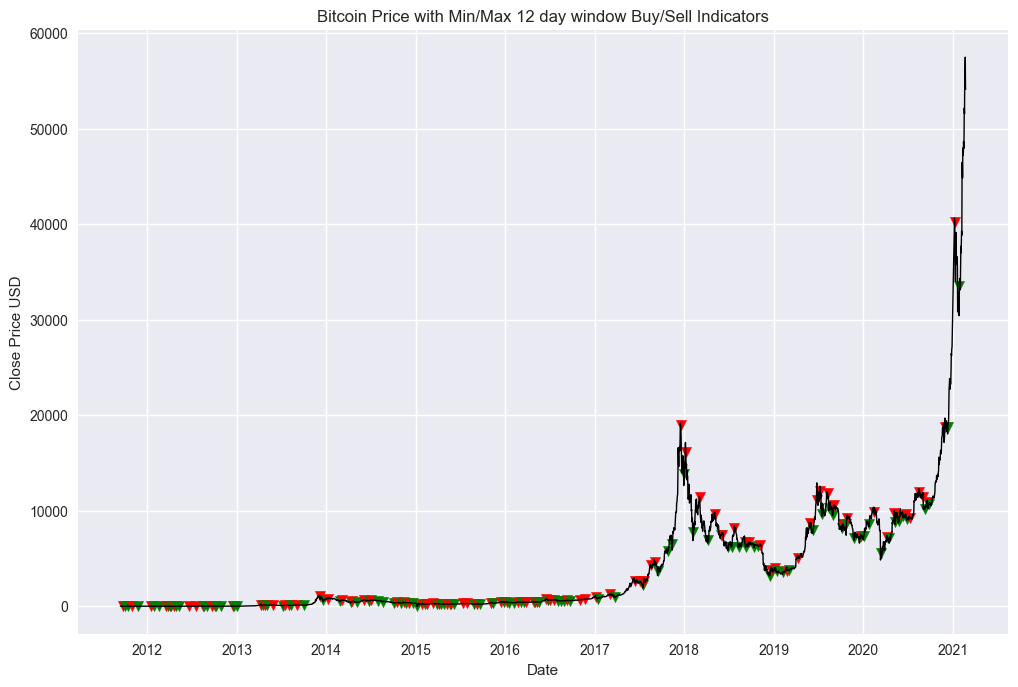

In [8]:
#Using matplotlib to add required columns
# turn this into a plotting function
# FIRST column of df is called index!!

fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')


# df_ta['index'] = pd.to_datetime(df_ta['index']) ## Remeber this! its super helpful for graphing dataframes

plt.plot(df_ta.index, df_ta['close'],linewidth=1,color='black')


# label axis's
plt.xlabel('Date')  
plt.ylabel('Close Price USD')  
plt.title('Bitcoin Price with Min/Max 12 day window Buy/Sell Indicators') 

for i in range(0,len(btcUSD)):
    if df_ta['buySellHold'][i] == "BUY":
        plt.scatter(df_ta.index[i],df_ta['close'][i], label='skitscat', color='green', s=55, marker="v") #BUY
    if df_ta['buySellHold'][i] == "SELL":
        plt.scatter(df_ta.index[i],df_ta['close'][i], label='skitscat', color='red', s=55, marker="v") #SELL
        
   
# plt.axis([df_ta.index[3000], df_ta.index[4000], 0, 20000])

- __Image Creation:__ 

    - Our Image will be linked to our label from above to train the CNN
    - __What we need__

        
    - Intervals 6 - 20 days 
    - We want oscialtor analysis indicators that we can turn into a signal image 
    - 15x15 image is generated by using 15 technical indicators and 15 diﬀerentintervals of technical indicators
    - Its important that the order of data is unique and cant be changed 
    - To use the git hub packagae I found I need to reformate my data.
    - I need a dataset with
    
    
    
    - I need each indicator made for 6 - 20 days
    - first image will be 20 days in
    - last image will be len(data) - 20
    
    
Volume
__Volume Weighted Average Price (VWAP)__

- VWAP equals the dollar value of all trading periods divided by the total trading volume for the current day.
- The calculation starts when trading opens and ends when it closes.
- Because it is good for the current trading day only, intraday periods and data are used in the calculation.
-   Args:
        high(pandas.Series): dataset 'High' column.
        low(pandas.Series): dataset 'Low' column.
        close(pandas.Series): dataset 'Close' column.
        volume(pandas.Series): dataset 'Volume' column.
        window(int): n period.
        fillna(bool): if True, fill nan values.


Trend

__Simple Moving Average (SMA)__ 

-  Args:
        close(pandas.Series): dataset 'Close' column.
        window(int): n period.
        fillna(bool): if True, fill nan values.
        
__Exponential Moving Average (EMA)__ 

-  Args:
        close(pandas.Series): dataset 'Close' column.
        window(int): n period.
        fillna(bool): if True, fill nan values.
        
__Weighted Moving Average (WMA)__

-  Args:
        close(pandas.Series): dataset 'Close' column.
        window(int): n period.
        fillna(bool): if True, fill nan values.


__Moving Average Convergence Divergence (MACD)__ 

-   Is a trend-following momentum indicator that shows the relationship between
    two moving averages of prices.
-   Args:
        close(pandas.Series): dataset 'Close' column.
        window_fast(int): n period short-term.
        window_slow(int): n period long-term.
        window_sign(int): n period to signal.
        fillna(bool): if True, fill nan values.


__Average Directional Movement Index (ADX)__


- The Plus Directional Indicator (+DI) and Minus Directional Indicator (-DI)
    are derived from smoothed averages of these differences, and measure trend
    direction over time. 
- These two indicators are often referred to collectively as the Directional Movement Indicator (DMI).
- The Average Directional Index (ADX) is in turn derived from the smoothed averages of the difference between +DI and -DI, and measures the strength of the trend (regardless of direction) over time.
- Using these three indicators together, chartists can determine both the direction and strength of the trend.
-   Args:
        high(pandas.Series): dataset 'High' column.
        low(pandas.Series): dataset 'Low' column.
        close(pandas.Series): dataset 'Close' column.
        window(int): n period.
        fillna(bool): if True, fill nan values.

__Triple Exponentially Smoothed Moving Average (TRIX)__  

- Shows the percent rate of change of a triple exponentially smoothed moving
    average.
-  Args:
        close(pandas.Series): dataset 'Close' column.
        window(int): n period.
        fillna(bool): if True, fill nan values.

__Relative Strength Index (RSI)__

- Compares the magnitude of recent gains and losses over a specified time
    period to measure speed and change of price movements of a security. 
- It is primarily used to attempt to identify overbought or oversold conditions in
    the trading of an asset.
    
-  Args:
        close(pandas.Series): dataset 'Close' column.
        window(int): n period.
        fillna(bool): if True, fill nan values.

__Ultimate Oscillator (UO)__

- Larry Williams' (1976) signal, a momentum oscillator designed to capture
    momentum across three different timeframes.
    
-  Args:
        high(pandas.Series): dataset 'High' column.
        low(pandas.Series): dataset 'Low' column.
        close(pandas.Series): dataset 'Close' column.
        window1(int): short period.
        window2(int): medium period.
        window3(int): long period.
        weight1(float): weight of short BP average for UO.
        weight2(float): weight of medium BP average for UO.
        weight3(float): weight of long BP average for UO.
        fillna(bool): if True, fill nan values with 50.

__Kaufman's Adaptive Moving Average (KAMA)__ 

- Moving average designed to account for market noise or volatility. 
- KAMA will closely follow prices when the price swings are relatively small and
    the noise is low. 
- KAMA will adjust when the price swings widen and follow prices from a greater distance. 
- This trend-following indicator can be used to identify the overall trend, time turning points and filter price
    movements.
    
- Args:
        close(pandas.Series): dataset 'Close' column.
        window(int): n period.
        pow1(int): number of periods for the fastest EMA constant.
        pow2(int): number of periods for the slowest EMA constant.
        fillna(bool): if True, fill nan values.


__Williams %R (WR)__ 

- Developed by Larry Williams, Williams %R is a momentum indicator that is the inverse of the Fast Stochastic Oscillator. 
- Also referred to as %R, Williams %R reflects the level of the close relative to the highest high for the look-back period. 
- In contrast, the Stochastic Oscillator reflects the level of the close relative to the lowest low. 
- %R corrects for the inversion by multiplying the raw value by -100. 
- As a result, the Fast Stochastic Oscillator and Williams %R produce the exact same lines, only the scaling is different. 
- Williams %R oscillates from 0 to -100.
- Readings from 0 to -20 are considered overbought. Readings from -80 to -100 are considered oversold.
- Unsurprisingly, signals derived from the Stochastic Oscillator are also applicable to Williams %R.
- %R = (Highest High - Close)/(Highest High - Lowest Low) * -100
- Lowest Low = lowest low for the look-back period
- Highest High = highest high for the look-back period
- %R is multiplied by -100 correct the inversion and move the decimal.
- Args:
        high(pandas.Series): dataset 'High' column.
        low(pandas.Series): dataset 'Low' column.
        close(pandas.Series): dataset 'Close' column.
        lbp(int): lookback period.
        fillna(bool): if True, fill nan values with -50.


__Awesome Oscillator (AO)__

- The Awesome Oscillator is an indicator used to measure market momentum.
- AO calculates the difference of a 34 Period and 5 Period Simple Moving
    Averages. 
- The Simple Moving Averages that are used are not calculated using closing price but rather each bar's midpoints. - AO is generally used to affirm trends or to anticipate possible reversals.

- Args:
        high(pandas.Series): dataset 'High' column.
        low(pandas.Series): dataset 'Low' column.
        window1(int): short period.
        window2(int): long period.
        fillna(bool): if True, fill nan values with -50.

__Rate of Change (ROC)__

- The Rate-of-Change (ROC) indicator, which is also referred to as simply
    Momentum, is a pure momentum oscillator that measures the percent change in
    price from one period to the next. 
- The ROC calculation compares the current price with the price “n” periods ago. 
- The plot forms an oscillator that fluctuates above and below the zero line as the Rate-of-Change moves from
    positive to negative. 
- As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings.
- Divergences fail to foreshadow reversals more often than not, so this article will forgo a detailed discussion on them. 
- Even though centerline crossovers are prone to whipsaw, especially short-term, these crossovers
    can be used to identify the overall trend. 
- Identifying overbought or oversold extremes comes naturally to the Rate-of-Change oscillator.

-  Args:
        close(pandas.Series): dataset 'Close' column.
        window(int): n period.
        fillna(bool): if True, fill nan values.



__Percentage Price Oscillator (PPO)__

- The Percentage Price Oscillator (PPO) is a momentum oscillator that measures the difference between two moving averages as a percentage of the larger moving average.

-  Args:
        close(pandas.Series): dataset 'Price' column.
        window_slow(int): n period long-term.
        window_fast(int): n period short-term.
        window_sign(int): n period to signal.
        fillna(bool): if True, fill nan values.
    
__Percentage Volume Oscillator (PVO)__ 

- The Percentage Volume Oscillator (PVO) is a momentum oscillator for volume.
- The PVO measures the difference between two volume-based moving averages as a percentage of the larger moving average.

-  Args:
        volume(pandas.Series): dataset 'Volume' column.
        window_slow(int): n period long-term.
        window_fast(int): n period short-term.
        window_sign(int): n period to signal.
        fillna(bool): if True, fill nan values.
   

    

In [9]:
# Import Indicators

# from momentum 
from ta.momentum import RSIIndicator  # good 
from ta.momentum import UltimateOscillator # not good maybe
from ta.momentum import KAMAIndicator #  good
from ta.momentum import WilliamsRIndicator # good
from ta.momentum import AwesomeOscillatorIndicator # might not work
from ta.momentum import ROCIndicator # good 
from ta.momentum import PercentagePriceOscillator # good, just make the slow fast EMA our 15 variable changes
from ta.momentum import PercentageVolumeOscillator # good, just vary the slow and fast EMA


#from trend
from ta.trend import SMAIndicator # good
from ta.trend import EMAIndicator
from ta.trend import MACD
from ta.trend import WMAIndicator
from ta.trend import TRIXIndicator
from ta.trend import ADXIndicator
from ta.trend import AroonIndicator
from ta.trend import CCIIndicator
from ta.trend import DPOIndicator

#from volume
from ta.volume import VolumeWeightedAveragePrice

# First make a temp df and calc all indicators for a 20 day and plot all of them in a subplot
ta_temp = pd.DataFrame()
ta_temp = df_ta 

# Clean NaN values
ta_temp = dropna(df_ta)


# I should be able to use list comprehension




In [10]:
ta_temp.describe()

,close,open,high,volume,low
count,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000
mean,3907.463422,3895.351908,4016.951166,9743.703575,3762.166958
std,6289.631811,6248.291368,6481.036700,10100.930966,5998.507118
min,2.240000,2.220000,2.270000,0.250000,1.500000
25%,233.915000,233.842500,237.122500,3725.939444,229.025000
50%,648.750000,648.630000,661.550000,7161.294095,628.635000
75%,6871.757500,6861.145000,7106.005000,12446.822425,6652.407500
max,57492.910000,57485.740000,58354.140000,137070.178338,55537.990000


In [11]:
# calc indicators

# variable declarations

window_temp = 20 # this will go from 6- 20 when making image
fast_ema = 2
slow_ema = 30 

# Initialize Indicators

# RSI
indicator_RSI = RSIIndicator(close=ta_temp['close'], window=window_temp, fillna = True)
ta_temp['RSI_20'] = indicator_RSI.rsi()

# KAMA
indicator_KAMA = KAMAIndicator(close=ta_temp['close'],window=window_temp, pow1 = 2, pow2 = 20, fillna = True)
ta_temp['KAMA_20'] = indicator_KAMA.kama()

# Williams Percent r 
indicator_william_r = WilliamsRIndicator(high=ta_temp['high'], low=ta_temp['low'], close=ta_temp['close'] ,lbp =window_temp, fillna = True)
ta_temp['williams_r'] = indicator_william_r.williams_r()

# ROC 
indicator_ROC = ROCIndicator(close=ta_temp['close'], window=window_temp, fillna = True)
ta_temp['ROC'] = indicator_ROC.roc()

# Percent Price Oscil
indicator_percentPrice = PercentagePriceOscillator(close = ta_temp['close'], window_slow = 26, window_fast = 12, window_sign = 9, fillna = True)
ta_temp['PercentPriceOsciLine'] = indicator_percentPrice.ppo()
ta_temp['PercentPriceOsciSignal'] = indicator_percentPrice.ppo_signal()

# Percent Volume Oscilator 
indicator_percentVolume = PercentageVolumeOscillator(volume = ta_temp['volume'], window_slow = 26, window_fast = 12, window_sign = 9, fillna = True)
ta_temp['percentVolumeOsciLINE'] = indicator_percentVolume.pvo()
ta_temp['percentVolumeOsciSignal'] = indicator_percentVolume.pvo_signal()

# MACD 
indicator_MACD = MACD(close = ta_temp['close'], window_slow =  26, window_fast = 12, window_sign = window_temp, fillna = True)
ta_temp['MACD'] = indicator_MACD.macd()
ta_temp['MACD_diff'] = indicator_MACD.macd_diff()

# EMA 20 
indicator_EMA = EMAIndicator(close = ta_temp['close'],window = window_temp, fillna = True)
ta_temp['EMA_20'] = indicator_EMA.ema_indicator()

# WMA 20 
indicator_WMA = WMAIndicator(close = ta_temp['close'], window = window_temp, fillna = True)
ta_temp['WMA_20'] = indicator_WMA.wma()

# Aroon
indicator_Aroon = AroonIndicator(close = ta_temp['close'], window = window_temp, fillna = True)
ta_temp['Aroon'] = indicator_Aroon.aroon_down()

#CCI
indicator_CCI = CCIIndicator(high = ta_temp['high'], low = ta_temp['low'], close = ta_temp['close'], window = window_temp, constant = 0.015, fillna = True)
ta_temp['CCI'] = indicator_CCI.cci()

#DPOI
indicator_DPOI = DPOIndicator(close = ta_temp['close'], window = window_temp, fillna = True)
ta_temp['DPOI'] = indicator_DPOI.dpo()

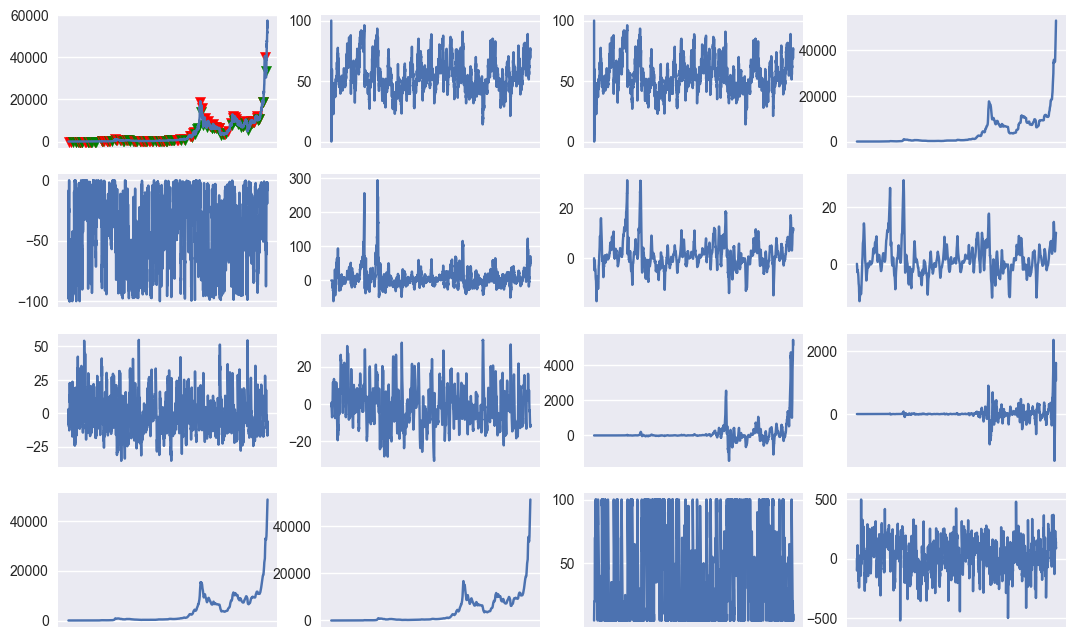

In [73]:
# Make subplots of all data that will be in images

# make data frame
cols_to_exlude = {"open","high","volume","low"}

ta_df = pd.DataFrame()
for col in ta_temp.columns:
    if col not in cols_to_exlude:
        ta_df[col] = ta_temp[col]

# variable declaration
numR = 4
numC = 4
col_names = ta_df.columns
k = 0

# declare figure
fig, axes = plt.subplots(figsize=(13,9), dpi= 100,nrows=numR, ncols=numC)

# plot everything 
for i in range(0,numR):
    for j in range(0,numC):
        if col_names[k] == "close":
            ta_temp[col_names[k]].plot(ax=axes[i,j]).get_xaxis().set_visible(False)
            
            for x in range(0,len(list(ta_df['close']))):
                if ta_df['buySellHold'][x] == "BUY":
                    axes[i,j].scatter(ta_df.index[x],ta_df['close'][x], label='skitscat', color='green', s=55, marker="v") #BUY
                if ta_df['buySellHold'][x] == "SELL":
                    axes[i,j].scatter(ta_df.index[x],ta_df['close'][x], label='skitscat', color='red', s=55, marker="v") #SELL
          
            
        elif col_names[k] ==  "buySellHold":
            #skip this column in df
            ta_df[col_names[k+1]].plot(ax=axes[i,j]).get_xaxis().set_visible(False)
                        
        else:
            
            ta_df[col_names[k]].plot(ax=axes[i,j]).get_xaxis().set_visible(False)
        k = k + 1
            
        


# Make Image!!
- Image is 15 by 15 matrix 
- For a CNN image the order has to be important
- each row will be an indicator value
- each column will be a day
- lets just make 1 first
- we clustered indicator groups(oscillator or trend) and similar behaving indicators together or in close proximity. (This should already be done because I loaded them all together)

In [143]:
image_test  = []
imageWindow = 15
startDay = 35 # some indicators take almost 20 days to get enough data startDay = indicatorWindow + imageWindow

# put in while loop once we have all images
# each image needs to be connected with a buy/sell/hold label
# i think i have to normalize all of the data first
# cnn_df = [date"index"][images][label]

k = 0
min_test =   10000000
max_test = - 10000000

for col in ta_df.columns:
    if col != "close" and col != "buySellHold":
        row = []
        normalized_row  = []
        row = list(ta_df[col][(startDay - imageWindow):startDay])
        normalized_row = preprocessing.normalize([row])
        image_test.append(row)

        

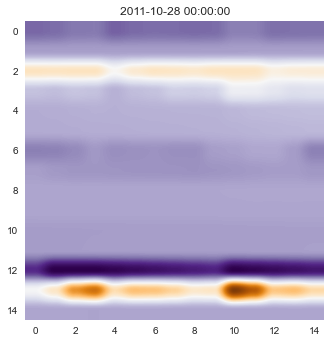

In [151]:
# selection for picking Color Maps

# colorMaps = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
#             'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
#             'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

# interp = [ 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


# for cc in colorMaps:
#     for ii in interp:
#          plt.imshow(image_test, cmap = cc, interpolation = ii)
#          plt.title(cc + " " + ii)
#          plt.grid(False)
#          plt.show()

# favorite color maps 
# 'prism' + 'mitchel' 
# 'terrain' 'hermite/micthel/sinc'
# 'gist' +  'stern'
# 'PuOr' + 'hanning'
# 'RdGy' + 'hanning'
# 'twilight' + 'hanning'

plt.imshow(image_test, cmap = 'PuOr', interpolation = 'hanning')
plt.title(ta_df.index[startDay])
plt.grid(False)
plt.show()


In [ ]:
# Make images for entire data set


image  = [] # temp list where image will be stored
imageRow = [] # will contain date, image, buySellHold
finalImages = [] # after each for loop we will append imageRow to this
windowI = 15
startDay = 35
dataLength = len(list(ta_df['close']))
k = startDay

while k < dataLength:
    for col in ta_df.columns:
        if col != "close" and col != "buySellHold":
            row = []
            normalized_row  = []
            row = list(ta_df[col][(startDay - imageWindow):startDay])
            normalized_row = preprocessing.normalize([row])
            image.append(row)

